### Importing libraries

In [116]:
!python3 -m pip install numpy pandas scikit-learn seaborn

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [117]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
d=pd.read_csv(r'C:/Users/nagkisho/Downloads/archive (2)/spam.csv', encoding='latin-1') 

In [119]:
d.head() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [120]:
df = d.iloc[:,0:2].values 

In [121]:
df = pd.DataFrame(df) 

In [122]:
df.columns=['Class','Text'] 

In [123]:
df.head() 

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [125]:
df.isna().sum() 

Class    0
Text     0
dtype: int64

In [126]:
df.describe() 

,Class,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Visualization 

In [127]:
ns = df["Class"].isin(['ham']).sum(axis=0) 

In [128]:
s = df["Class"].isin(['spam']).sum(axis=0) 

In [129]:
label=['Spam','Not Spam'] 

In [130]:
a = [s,ns] 

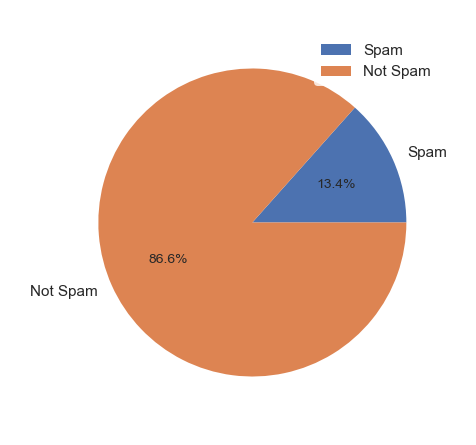

In [131]:
plt.pie(x=a,labels=label,autopct='%1.1f%%') 
plt.legend() 
plt.show() 

Text(0.5, 1.0, 'Comparing number of spam messages to number of non spam messages')

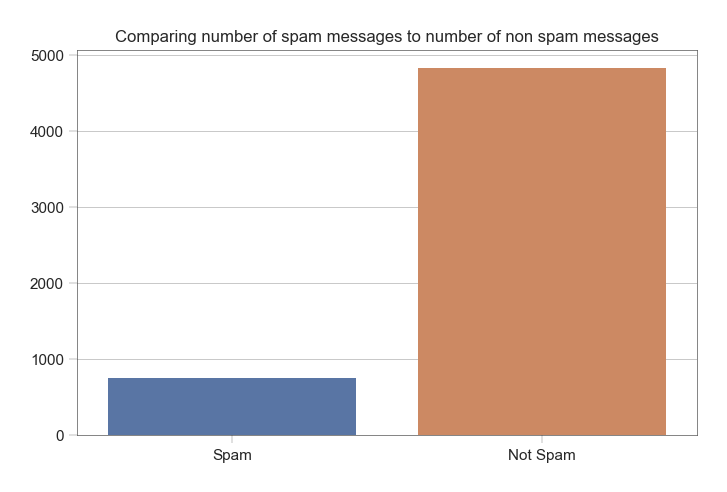

In [132]:
# plt.figure(figsize=(12,8)) 
ax =sns.barplot(x=label,y=a)
plt.title('Comparing number of spam messages to number of non spam messages') 

In [133]:
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()      
    ax.annotate('{}'.format(height), (x +0.25, y + height + 0.8)) 
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

# Preprocessing

In [134]:
def clean_data(text):     
    out = re.sub('[^a-zA-Z]', ' ', text)      
    out = out.lower()      
    out = out.split()     
    out = ' '.join(out)     
    return out 

In [135]:
def tokenize_word(text):     
    return nltk.word_tokenize(text) 
def remove_stopwords(text):     
    stop_words = set(stopwords.words("english")+['u','ur','r','n'])      
    filtered_text = [word for word in text if word not in stop_words]     
    return filtered_text 
def lemmatize_word(text):     
    lemmatizer = WordNetLemmatizer()     
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]     
    return lemmas 
def get_processed_tokens(text):     
    text = clean_data(text)     
    text = tokenize_word(text)    
    text = remove_stopwords(text)     
    text = lemmatize_word(text)     
    return text 

In [136]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagkisho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nagkisho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [138]:
pip install stopwords

In [139]:
from nltk.stem import WordNetLemmatizer

In [140]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagkisho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
from nltk.corpus import stopwords

In [142]:
df['processed_text'] = df['Text'].apply(get_processed_tokens) 

In [143]:
df.head() 

,Class,Text,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, g..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, go, usf, live, around, though]"


In [144]:
corpus= [] 
for i in df["processed_text"]:     
    msg = ' '.join([row for row in i])     
    corpus.append(msg) 

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [146]:
tfidf = TfidfVectorizer() 
X = tfidf.fit_transform(corpus).toarray() 
X.shape 

(5572, 6577)

# Word Cloud 

In [147]:
text = ' '.join(corpus) 
wc = WordCloud(background_color='black').generate(text)

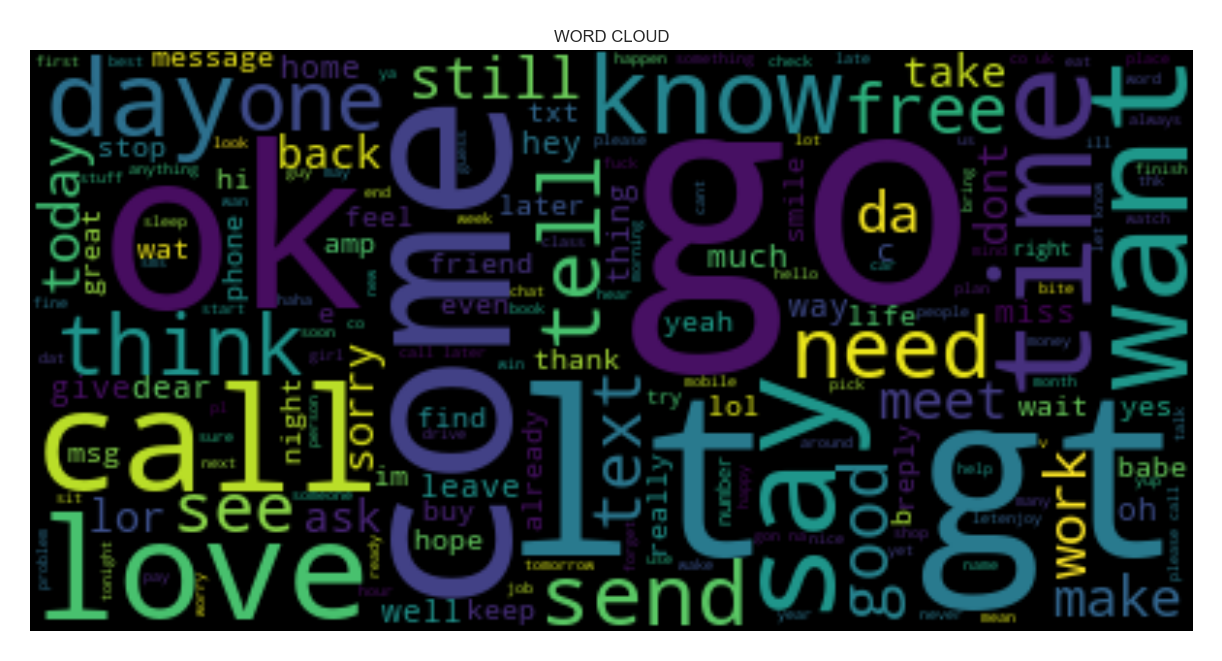

In [148]:
plt.figure(figsize=[15,20]) 
plt.title("WORD CLOUD") 
plt.axis("off") 
plt.imshow(wc,interpolation='bilinear') 
spam_corpus=[] 

In [149]:
for i in df[df['Class']=='spam']["processed_text"]:
    msg = ' '.join([row for row in i])     
    spam_corpus.append(msg) 
    text1 = ' '.join(spam_corpus)

In [150]:
wc = WordCloud(background_color='black').generate(text1)

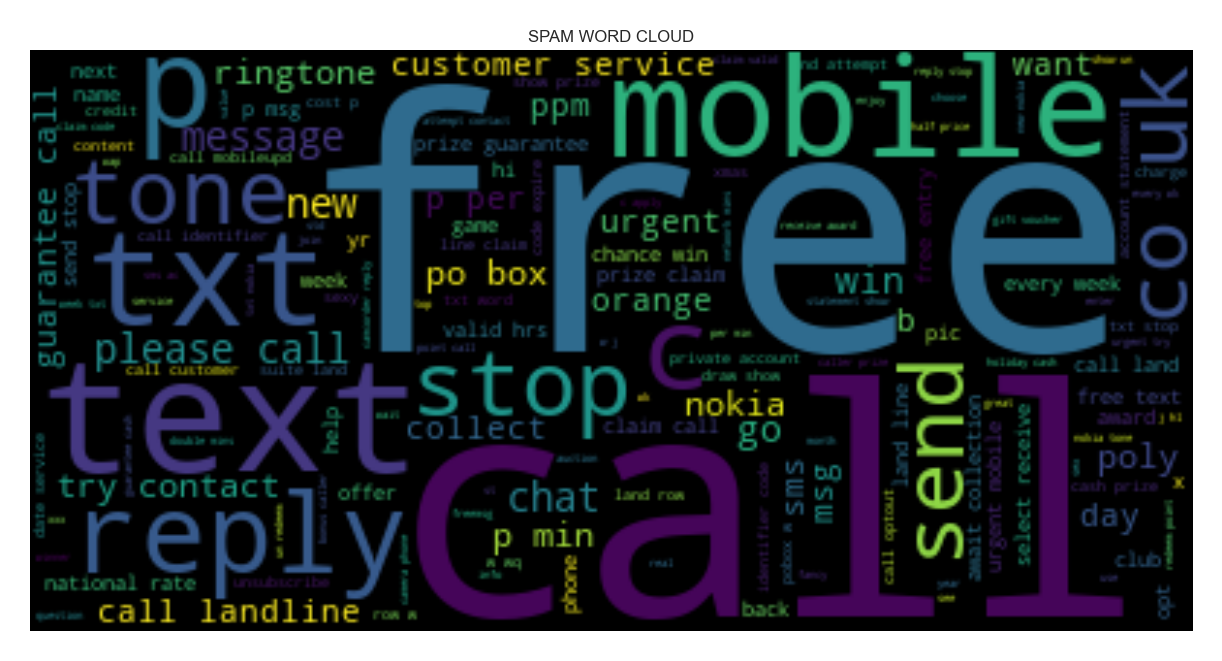

In [151]:
plt.figure(figsize=[15,20]) 
plt.title("SPAM WORD CLOUD") 
plt.axis("off") 
plt.imshow(wc,interpolation='bilinear') 

In [152]:
not_spam_corpus=[] 
for i in df[df['Class']=='ham']["processed_text"]: 
    msg = ' '.join([row for row in i]) 
    not_spam_corpus.append(msg)
    text2 = ' '.join(not_spam_corpus)

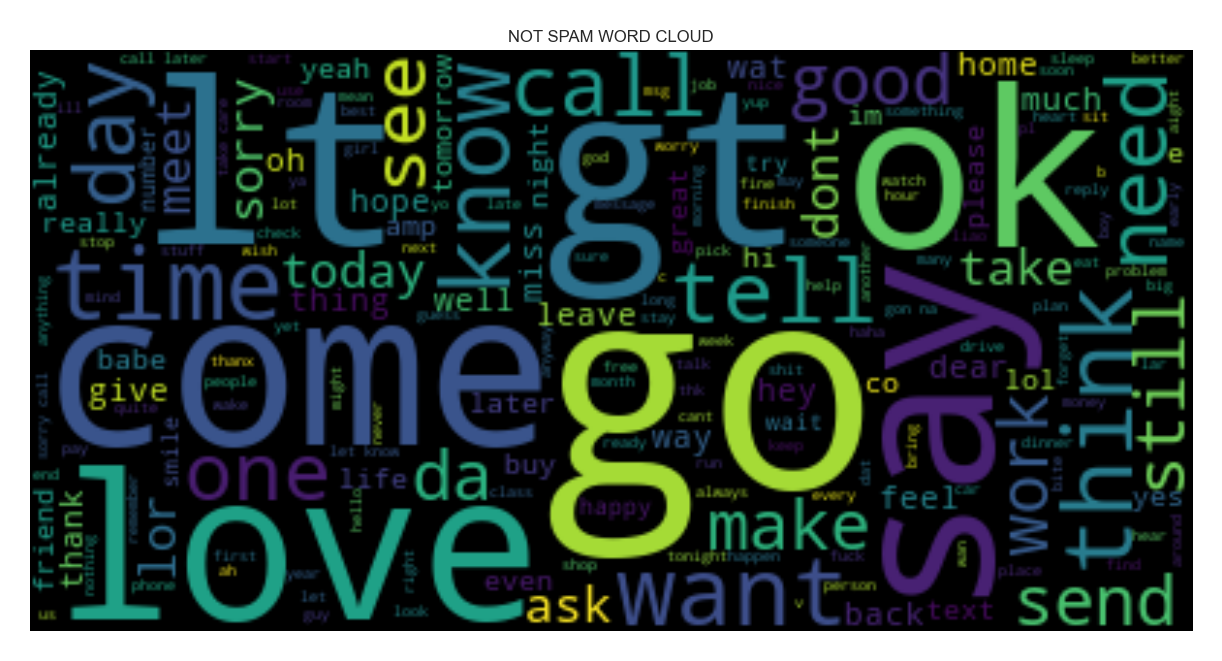

In [153]:
wc = WordCloud(background_color='black').generate(text2) 
plt.figure(figsize=[15,20]) 
plt.title("NOT SPAM WORD CLOUD") 
plt.axis("off") 
plt.imshow(wc,interpolation='bilinear') 

In [154]:
X 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [155]:
X.shape 

(5572, 6577)

In [156]:
y = df.iloc[:,0:1] 
print(y) 
  

     Class
0      ham
1      ham
2     spam
3      ham
4      ham
...    ...
5567  spam
5568   ham
5569   ham
5570   ham
5571   ham

[5572 rows x 1 columns]


In [157]:
y = df.iloc[:,0:1] 
print(y) 
print(X.shape,y.shape)

     Class
0      ham
1      ham
2     spam
3      ham
4      ham
...    ...
5567  spam
5568   ham
5569   ham
5570   ham
5571   ham

[5572 rows x 1 columns]
(5572, 6577) (5572, 1)


# Data Splitting 

In [158]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42) 
x_train.shape 
x_test.shape
y_train.shape 
y_train 

,Class
1978,ham
3989,spam
3935,ham
4078,ham
4086,spam
...,...
3772,ham
5191,ham
5226,ham
5390,ham


# Multinomial Naive Bayes 

In [159]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

96.41255605381166


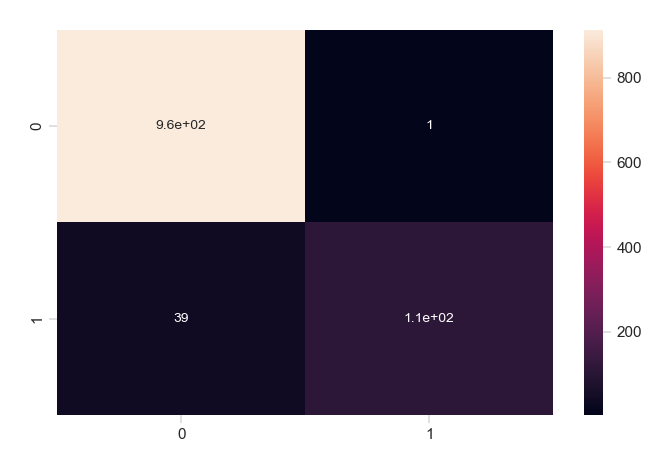

In [160]:
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB(fit_prior=True) 
nb.fit(x_train,y_train) 
y_nb = nb.predict(x_test) 
cm_nb = confusion_matrix(y_test,y_nb)
sns.heatmap(cm_nb,annot=True,robust=True) 
ac_nb = accuracy_score(y_test,y_nb) * 100
print(ac_nb) 

# K Nearest Neighbours 

91.92825112107623


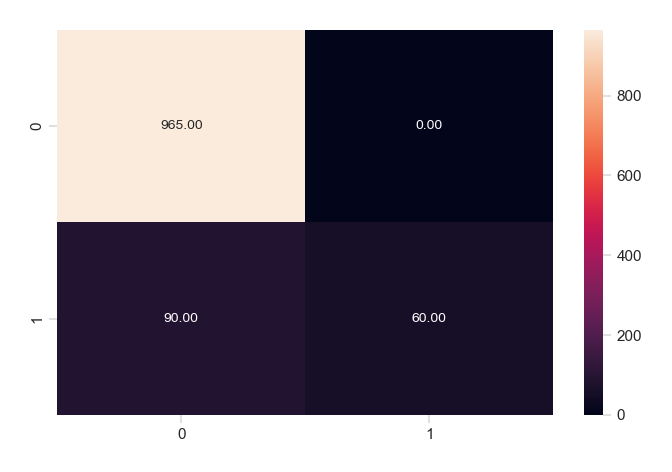

In [161]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier() 
knn.fit(x_train,y_train) 
y_knn=knn.predict(x_test) 
cm_knn = confusion_matrix(y_test,y_knn) 
sns.heatmap(cm_knn,annot=True,fmt='.2f') 
ac_knn = accuracy_score(y_test,y_knn) * 100
print(ac_knn) 

In [162]:
"""### Visualizing and Comparing the Accuracy Scores of the different Models""" 

'### Visualizing and Comparing the Accuracy Scores of the different Models'

In [163]:
ac = [ac_nb,ac_knn] 

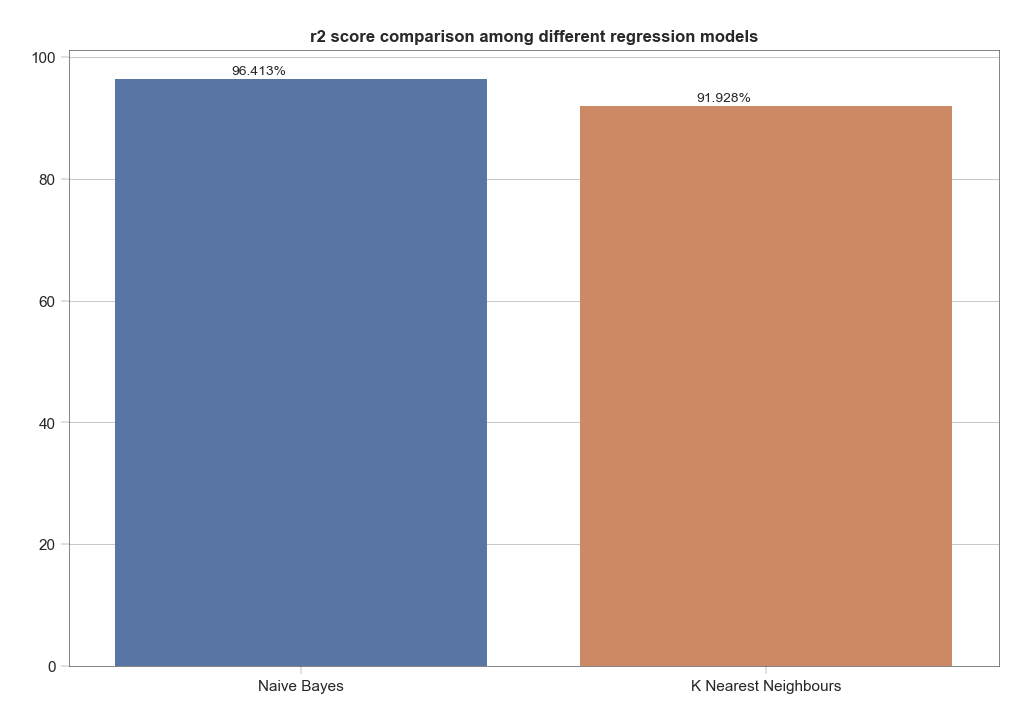

In [164]:
label = ['Naive Bayes','K Nearest Neighbours']
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x=label,y=ac) 
plt.title('r2 score comparison among different regression models',fontweight='bold') 
for p in ax.patches:   
    width=p.get_width()   
    height=p.get_height()   
    x,y = p.get_xy()   
    ax.annotate('{:.3f}%'.format(height), (x+0.25, y+height+0.8))  